In [1]:
import os
os.getcwd()
os.chdir("../..")
os.getcwd()

'C:\\Users\\omris\\OneDrive\\python\\me_toolbox'

# Helical Compression 

<table><tr>
<td> 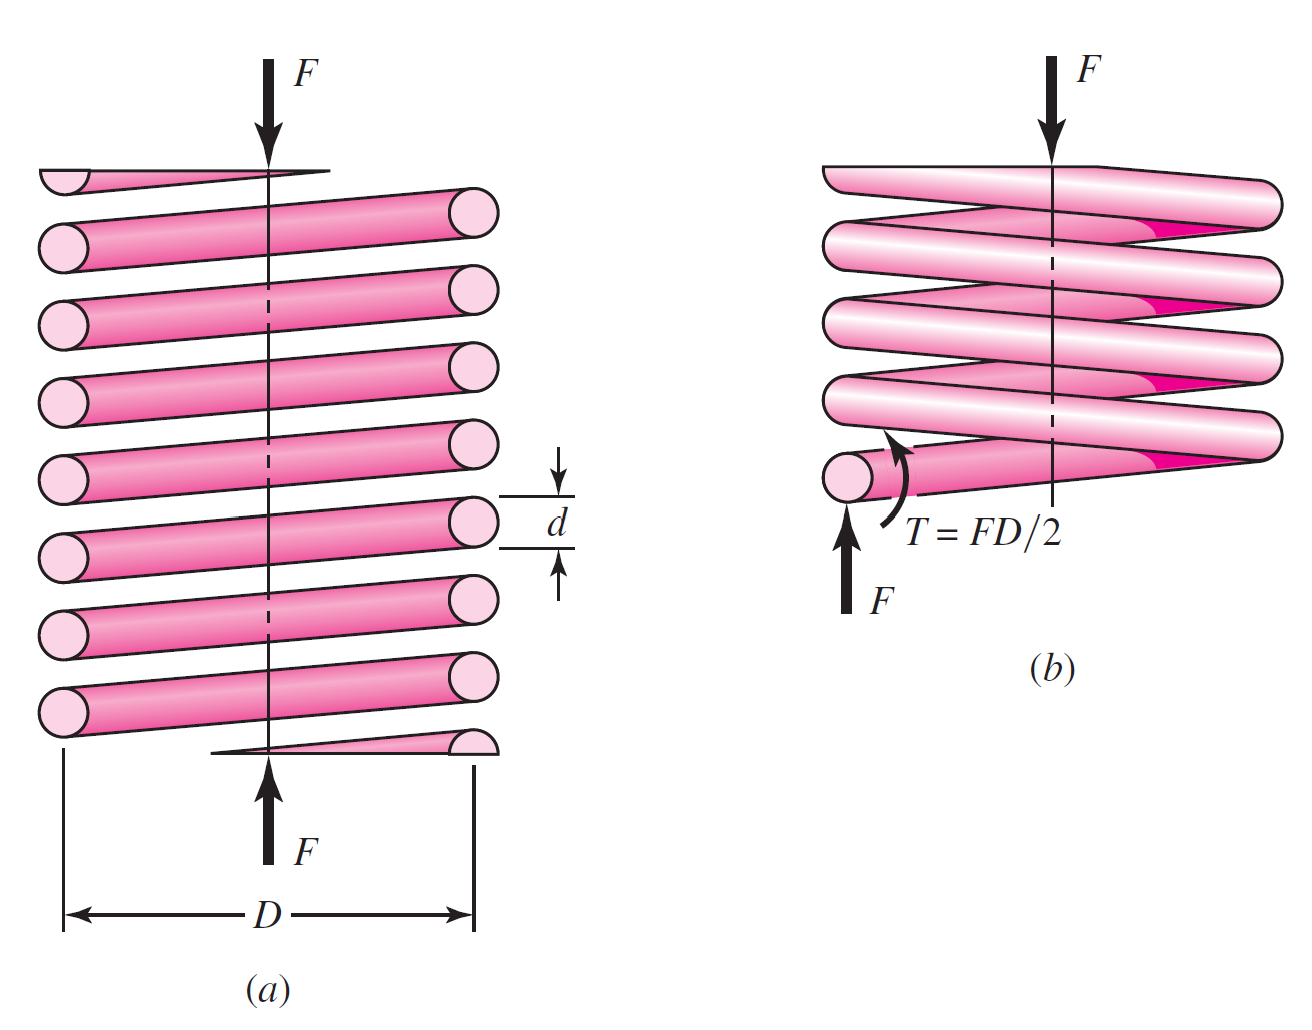 </td>
<td> 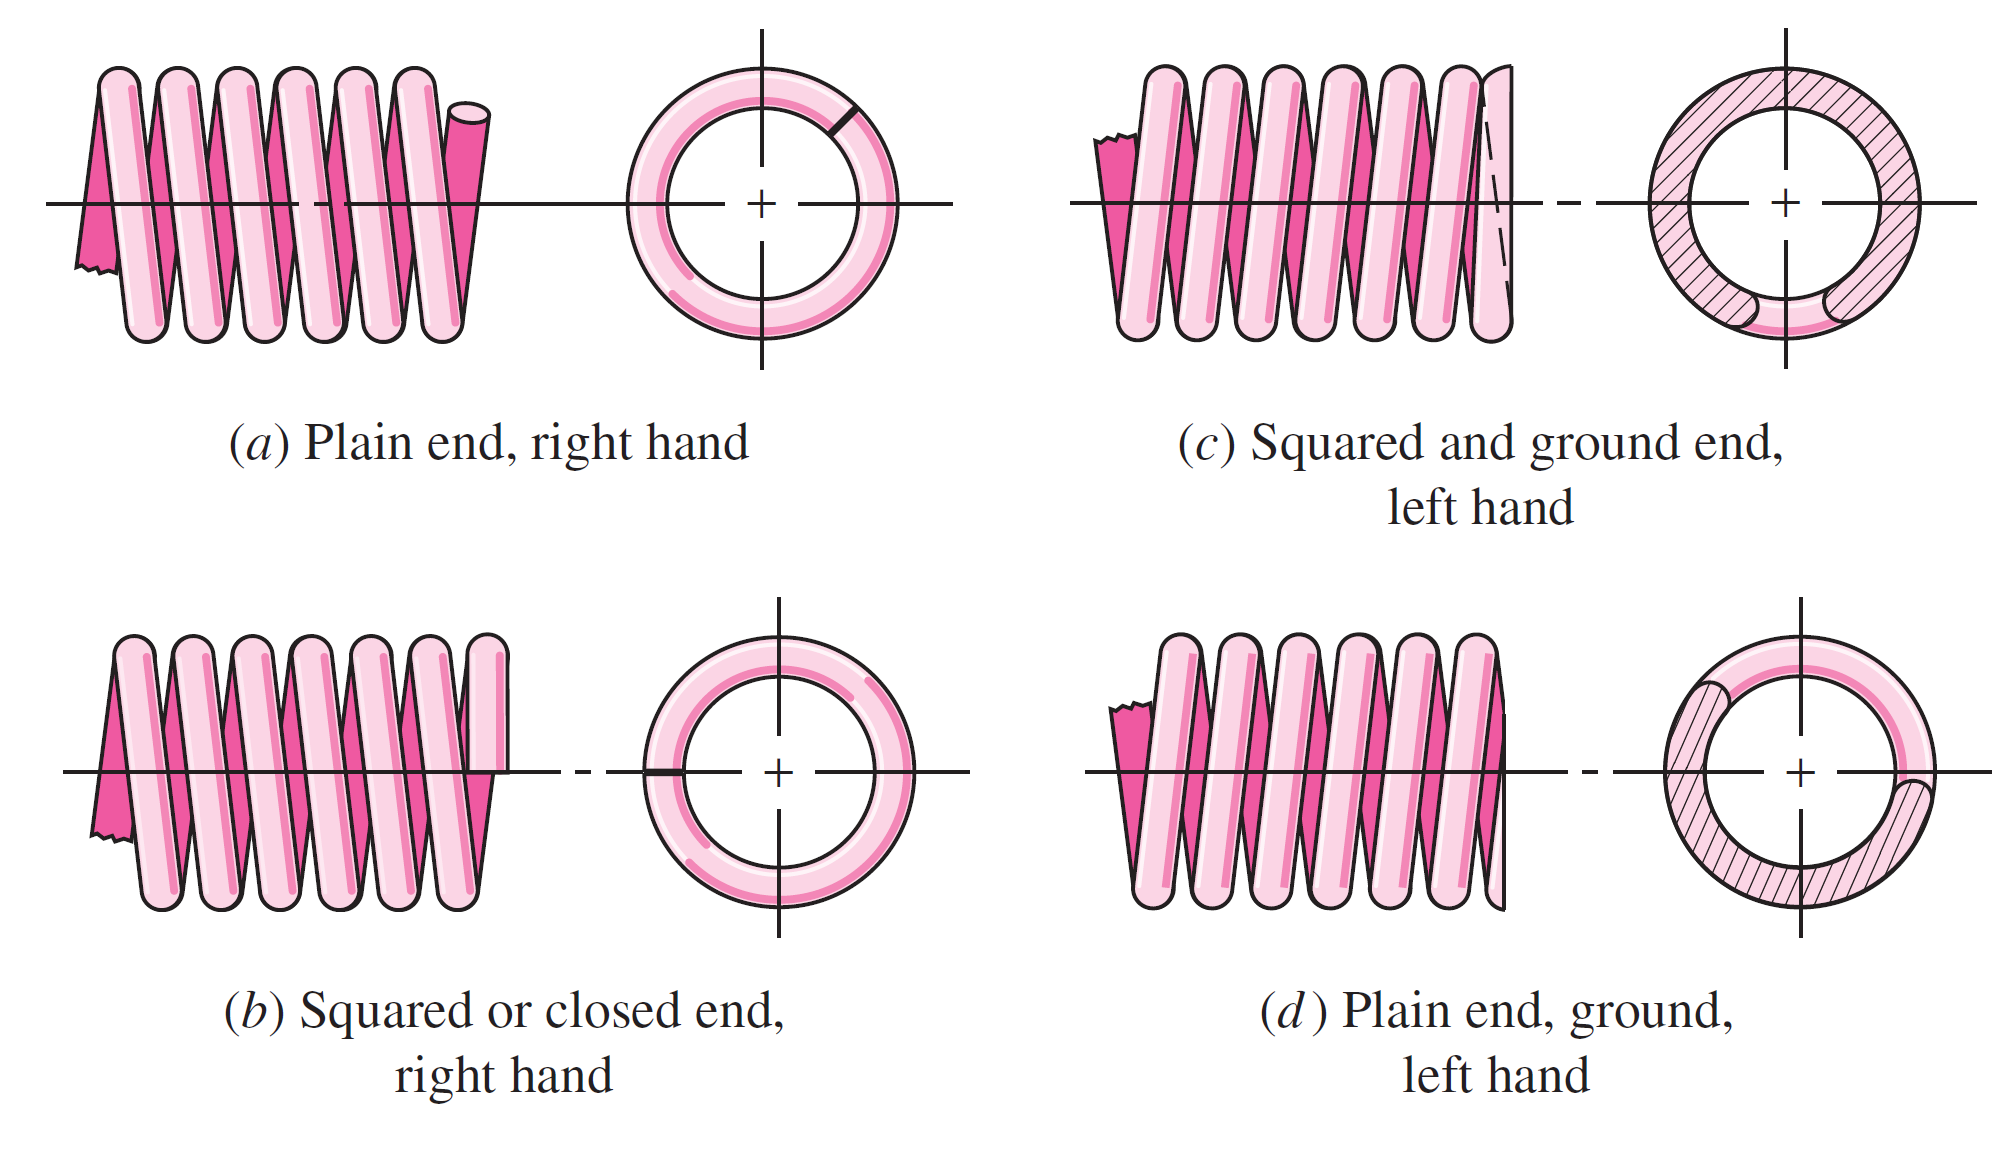 </td>
</tr></table>

Importing the relevant Classes

In [2]:
from me_toolbox.springs import HelicalCompressionSpring, Spring

Geometric properties

In [3]:
d = 6
D = 50

Material properties

Table 10-4 from Shigley:
<table><tr>
<td> 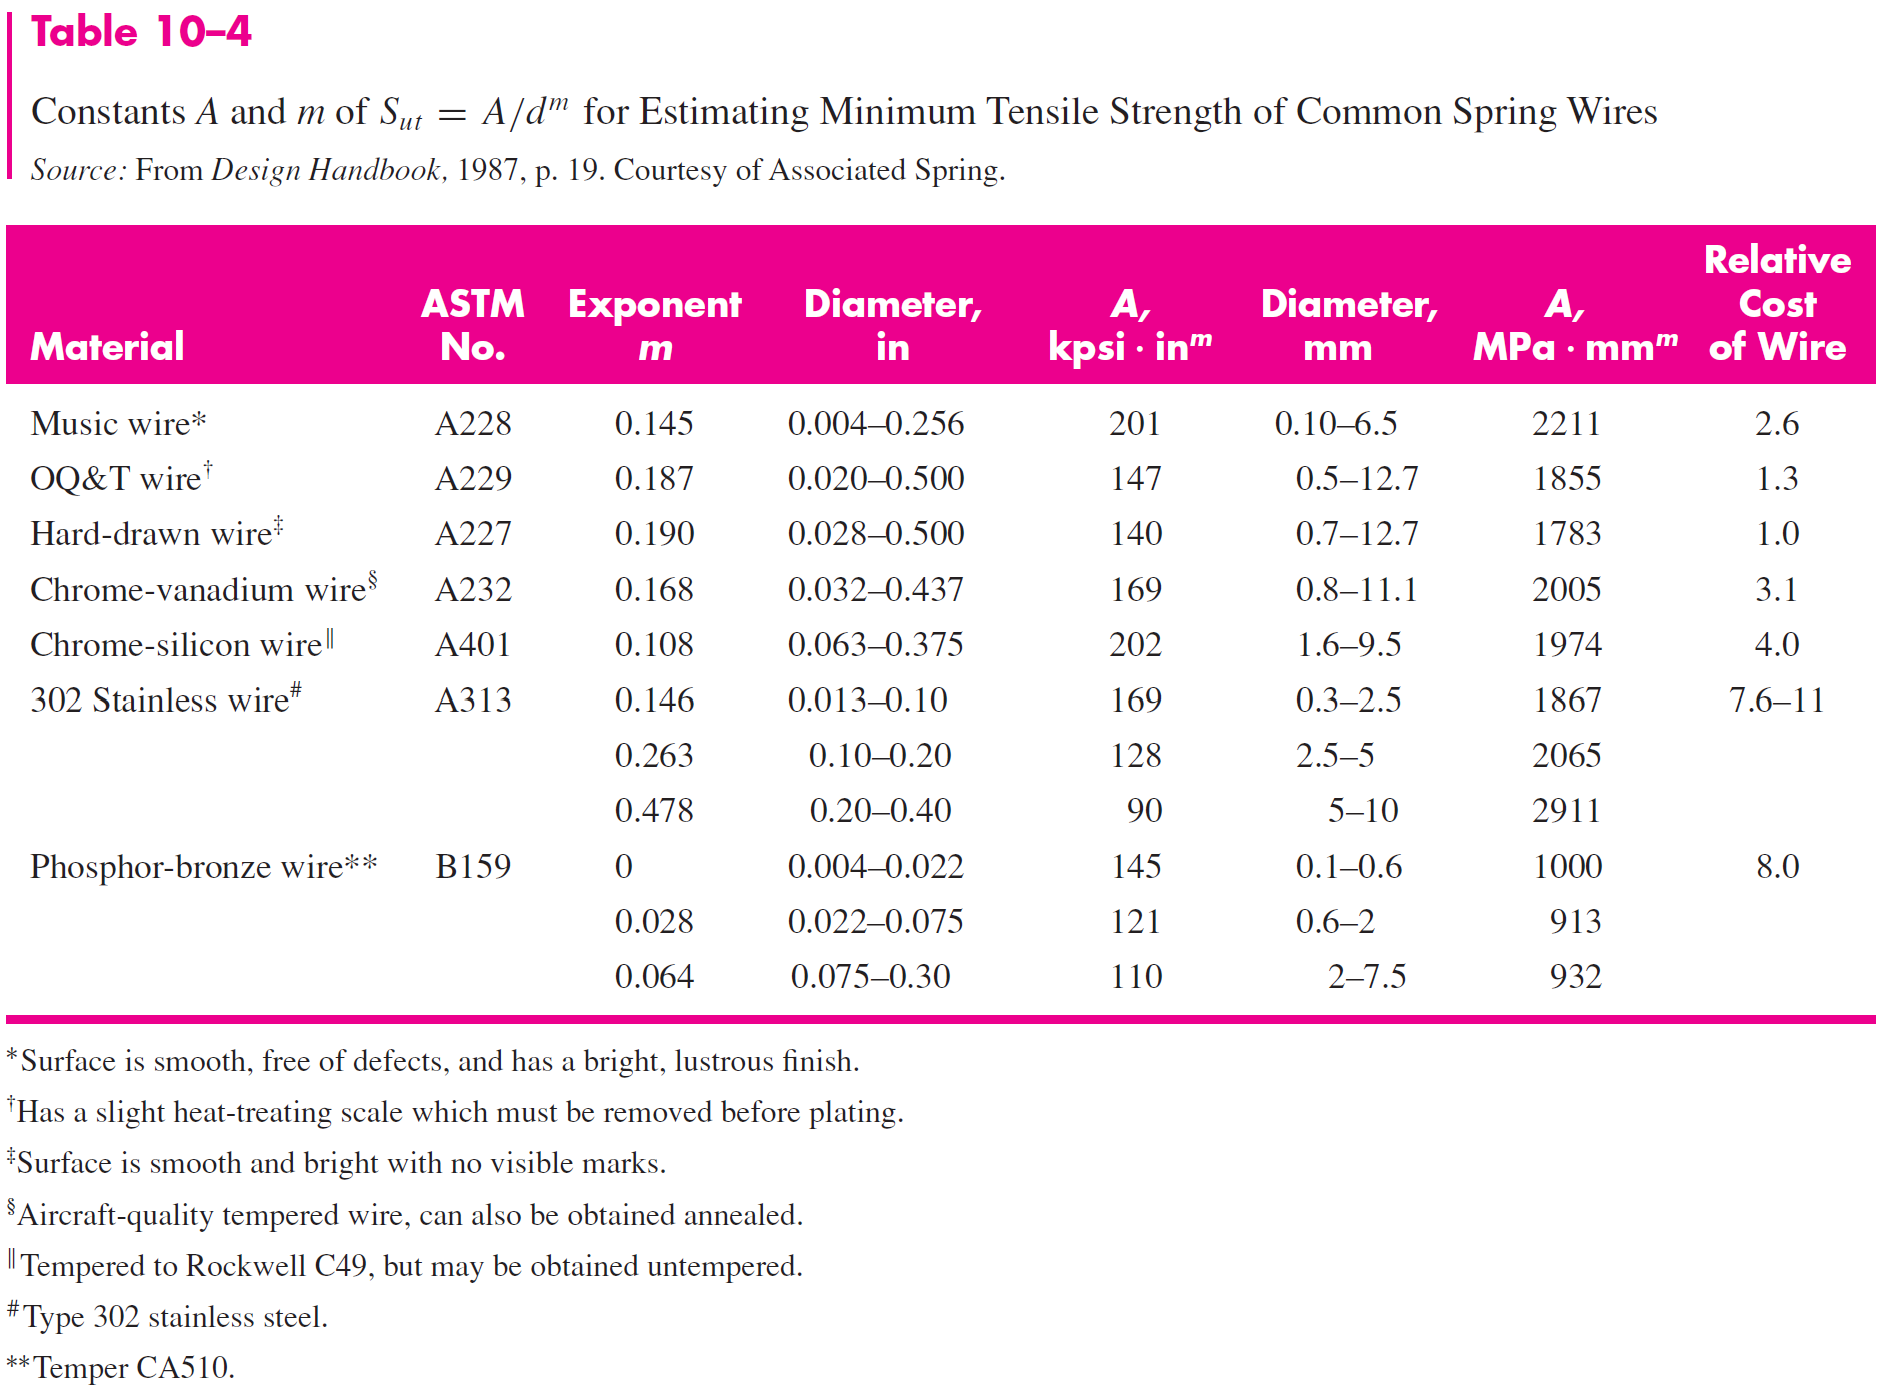 </td>
</tr></table>

Material options for use in Spring.material_prop method are:<br>
  * music wire<br>
  * oq&t wire<br>
  * hard-drawn wire<br>
  * chrome-vanadium wire<br>
  * chrome-silicon wire<br>
  * 302 stainless wire<br>
  * phosphore-bronze wire<br>

In [4]:
# music wire
G = 75e3  # [MPa]
E = 205e3  # [MPa]
Sut = Spring.material_prop('music wire', d, metric=True, verbose=False)
print(f"Sut = {Sut:.2f}")

Sut = 1705.13


Table 10-6 from Shigley:
<table><tr>
<td> 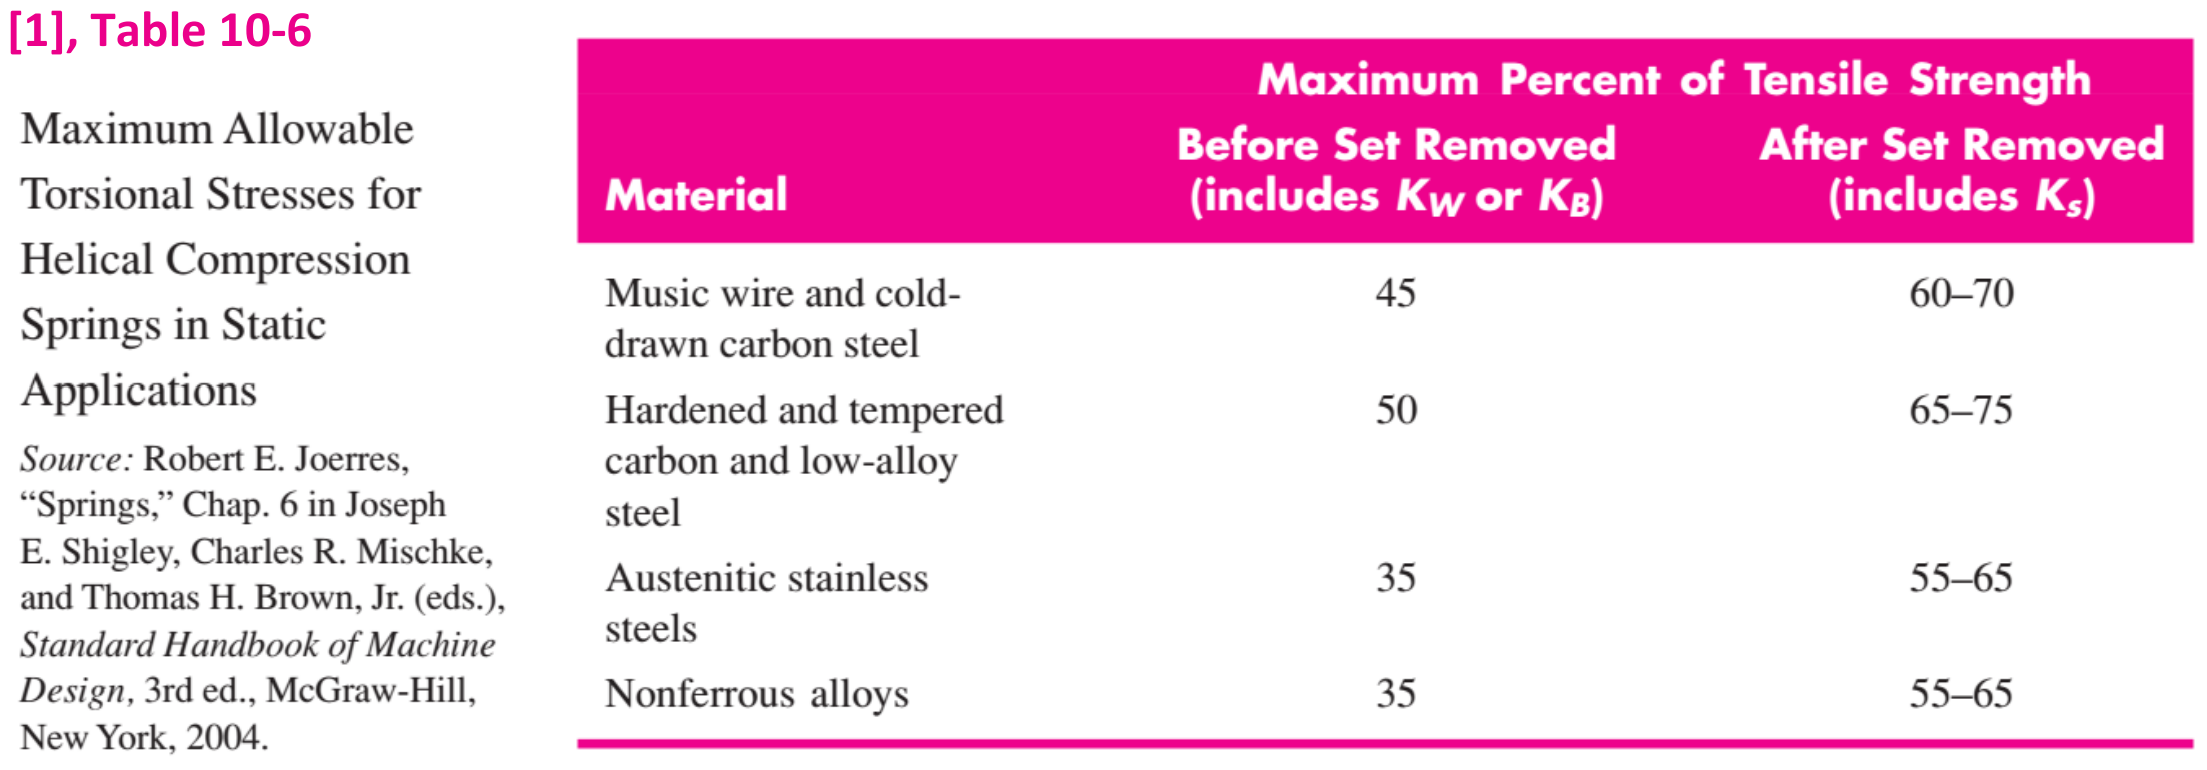 </td>
</tr></table>


In [5]:
yield_percent = 0.45

Forces and spring rate

In [6]:
k = 6  # [N/mm]
Fmax = 500  # [N]
Fmin = 100  # [N]

Defining the spring

In [7]:
spring = HelicalCompressionSpring(max_force=Fmax,
                                  wire_diameter=d,
                                  spring_diameter=D,
                                  ultimate_tensile_strength=Sut,
                                  shear_yield_percent=yield_percent,
                                  shear_modulus=G,
                                  elastic_modulus=E,
                                  end_type='squared and ground',
                                  spring_rate=k,
                                  active_coils=None,
                                  free_length=None,
                                  set_removed=False,
                                  shot_peened=True,
                                  density=None,  # kg/m3
                                  working_frequency=None,  # Hz
                                  anchors= 'fixed-hinged',
                                  zeta = 0.25)

Note: active_coils=16.08 is not in range [3,15],this can cause non linear behavior
Note: the free length was not given so Fsolid=625.00 was estimated using zeta=0.25
Note: buckling is accruing, max free length(free_length)= 190.14, free_length= 212.67


Calculated geometric properties

In [8]:
print(f"Free Length (L0) = {spring.free_length:.2f}\n"
      f"Active Coils (Na) = {spring.active_coils:.2f}\n"
      f"Total Coils (Nt) = {spring.total_coils:.2f}")

Free Length (L0) = 212.67
Active Coils (Na) = 16.08
Total Coils (Nt) = 18.08


Calculated material properties

In [9]:
print(f"Shear yield strength (Ssy) = {spring.shear_yield_strength:.2f}\n",
      f"Shear ultimate strength (Ssu) = {spring.shear_ultimate_strength:.2f}\n")

Shear yield strength (Ssy) = 767.31
 Shear ultimate strength (Ssu) = 1142.44



Static analysis

In [10]:
print(f"static safety factor = {spring.static_safety_factor():.2f}")
print(f"solid safety factor = {spring.static_safety_factor(solid=True):.2f}")

static safety factor = 2.21
solid safety factor = 1.77


Fatigue analysis

In [11]:
nf, ns = spring.fatigue_analysis(Fmax, Fmin, 99.999, verbose=True)
print(f"Fatigue safety factor (nf) = {nf:.2f}\n",
      f"Static safety factor (ns) = {ns:.2f}")


Alternating force = 200.00, Mean force = 300.00
Alternating shear stress = 138.65, Mean shear stress = 207.98
Sse = 335.61
Fatigue safety factor (nf) = 1.68
 Static safety factor (ns) = 2.21


Buckling test, Table 10-2 from Shigley:
<table><tr>
<td> 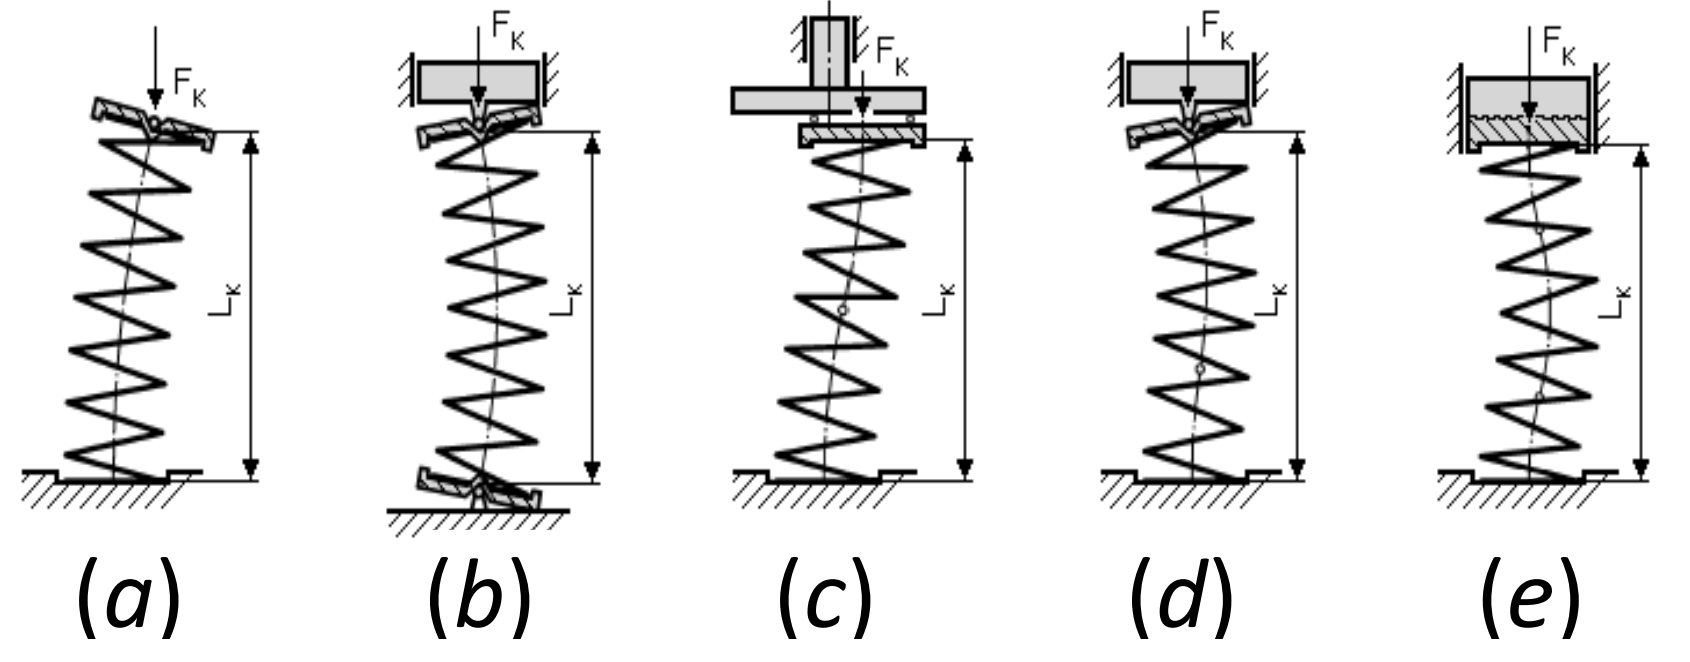 </td>
<td> 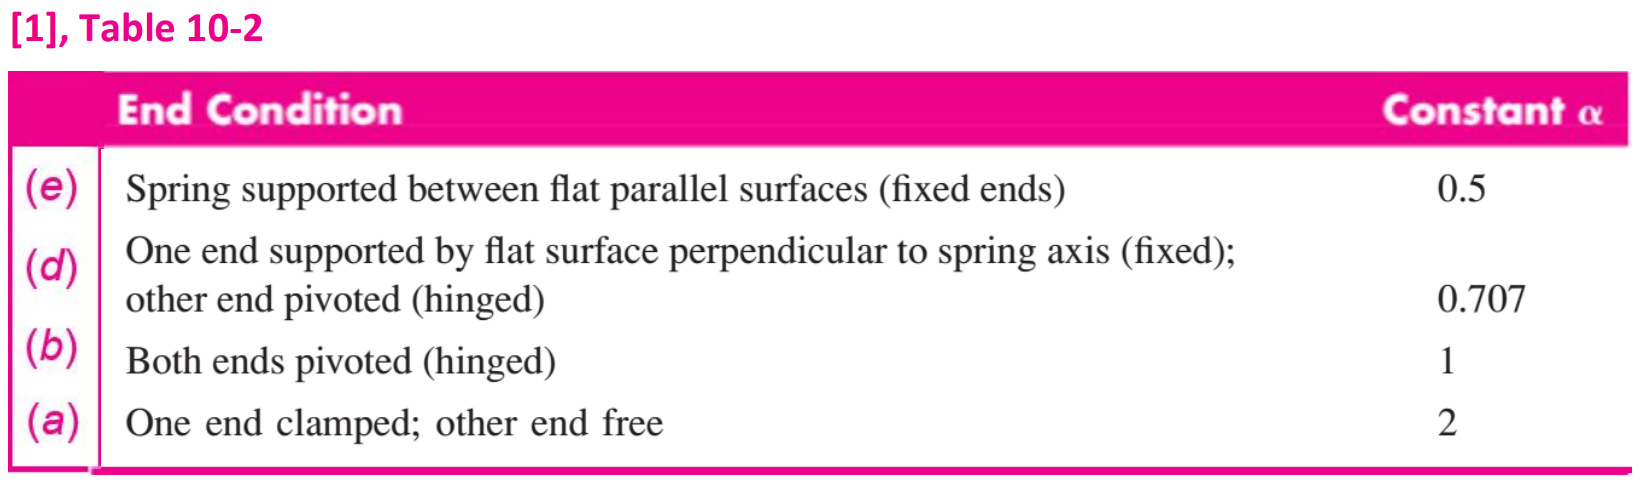 </td>
</tr></table>


In [12]:
spring.buckling('fixed-hinged', verbose=True);

Buckling is accruing, the max safe length = 190.14,  but the free_length = 212.67


In [13]:
spring.density = 7850  # [kg/m^3]
spring.working_frequency = 0.5  # [Hz]

The natural frequency must be greater than 20 times the working frequency<br>
$(f_{natural} = 20 \cdot f_{working})$

In [14]:
print(f"Natural frequency = {spring.natural_frequency:.2f}\n"
      f"20*Working frequency = {20*spring.working_frequency:.2f}")


Natural frequency = 2.60
20*Working frequency = 10.00
